In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import scipy as sp
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm
pd.set_option('display.width',500)
pd.set_option('display.max_columns',1000)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2 = sns.color_palette()[2]

In [3]:
CreditClient = pd.read_excel("default_ credit_clients.xls", header=1)
C=CreditClient

In [4]:
C=C.rename(columns={'default payment next month':'Y'})

In [5]:
C_X =C.drop(['ID','Y'],axis=1)

In [6]:
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,Ytrain, Ytest =train_test_split(C_X.values,C['Y'].values, random_state=0)

## Now will try to implement best parameter for random forest

In [7]:
from sklearn.cross_validation import KFold
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average
    

In [8]:
from sklearn.ensemble import RandomForestClassifier
max_score=0
n_estimator=0
##depth = np.random.randint(3,high=23, size=23, dtype='l') never gave me right parameter
depth =[3,5,10,15,18]
estimator =[5,7,10,13,18]
for m in depth:
    for e in estimator:
        clf1 = RandomForestClassifier(max_depth=m, n_estimators=e)
        score =cv_score(clf1,Xtrain,Ytrain)
    
        if score > max_score:
            max_score =score
            best_depth =m
            best_estimator = e
print (max_score, best_depth, best_estimator)    

0.815555555556 10 18


In [9]:
clf2= RandomForestClassifier(max_depth=best_depth, n_estimators=best_estimator)
clf2.fit(Xtrain,Ytrain)
Ypred =clf2.predict(Xtest)

In [10]:
print ("accuracy score: ",  accuracy_score(Ytest,Ypred))

accuracy score:  0.823333333333


In [11]:
C_X.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
7,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542
8,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0


## Now we will try to use RandomForest with less number of features

In [12]:
C_X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], dtype='object')

In [13]:
C_XX=C_X.drop(['PAY_3','PAY_AMT5','PAY_AMT6','BILL_AMT5','BILL_AMT6','BILL_AMT3','BILL_AMT4','BILL_AMT2','PAY_AMT5','PAY_AMT6','LIMIT_BAL','PAY_4','PAY_5'], axis=1)

In [14]:
C_XX.head(4)

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4
0,2,2,1,24,2,2,-2,3913,0,689,0,0
1,2,2,2,26,-1,2,2,2682,0,1000,1000,1000
2,2,2,2,34,0,0,0,29239,1518,1500,1000,1000
3,2,2,1,37,0,0,0,46990,2000,2019,1200,1100


In [15]:
from sklearn.cross_validation import train_test_split
X1_train, X1_test, Y1_train, Y1_test =train_test_split(C_XX.values, C['Y'].values, random_state=0)

In [16]:
from sklearn.cross_validation import KFold
def cv_score2(clf,x,y,score_func=accuracy_score):
    result =0
    nfold =5
    for train,test in KFold(y.size,nfold):
        clf2.fit(x[train],y[train])
        result += score_func(clf2.predict(x[test]),y[test])
    return result/nfold

In [17]:
max_depth = [5,7,10,15,18]
n_estimate = [5,10,15,18,20]
max_score2=0
for m in max_depth:
    for est in n_estimate:
        clf2= RandomForestClassifier(max_depth=m, n_estimators= est)
        score2 = cv_score2(clf2, X1_train, Y1_train)
        
        if score2 > max_score2:
            max_score2 =score2
            best_depth2 = m
            best_estimator2= est
print (max_score2, best_depth2 , best_estimator2)

0.8188 5 15


In [18]:
clf2=RandomForestClassifier(n_estimators= best_estimator2, max_depth =best_depth2)

In [19]:
clf2.fit(X1_train,Y1_train)
Y1_pred =clf2.predict(X1_test)
print ("Accuracy_score %.5f" % accuracy_score(Y1_test, Y1_pred))

Accuracy_score 0.82573


## Probability of getting default

In [30]:
C_F =C_XX[C_XX.SEX==2]


In [31]:
C_F.head(4)

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4
0,2,2,1,24,2,2,-2,3913,0,689,0,0
1,2,2,2,26,-1,2,2,2682,0,1000,1000,1000
2,2,2,2,34,0,0,0,29239,1518,1500,1000,1000
3,2,2,1,37,0,0,0,46990,2000,2019,1200,1100


In [33]:
C_FU=C_F[C_F.EDUCATION==2]

In [36]:
C_FU.head(3)

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4
0,2,2,1,24,2,2,-2,3913,0,689,0,0
1,2,2,2,26,-1,2,2,2682,0,1000,1000,1000
2,2,2,2,34,0,0,0,29239,1518,1500,1000,1000


In [40]:
C_YU=C

In [41]:
C_YU=C_YU[C_YU.SEX==2]

In [43]:
C_YU=C_YU[C_YU.EDUCATION==2]

In [44]:
train, test, f_train, f_test =train_test_split(C_FU.values, C_YU['Y'].values, random_state=0)

In [45]:
clf2.predict_proba(test)

array([[ 0.88874202,  0.11125798],
       [ 0.82750094,  0.17249906],
       [ 0.89031263,  0.10968737],
       ..., 
       [ 0.61987863,  0.38012137],
       [ 0.61626208,  0.38373792],
       [ 0.86017457,  0.13982543]])

In [20]:
clf2.predict_proba(X1_test)

array([[ 0.41833625,  0.58166375],
       [ 0.80706446,  0.19293554],
       [ 0.84008364,  0.15991636],
       ..., 
       [ 0.8540493 ,  0.1459507 ],
       [ 0.61038794,  0.38961206],
       [ 0.89461699,  0.10538301]])

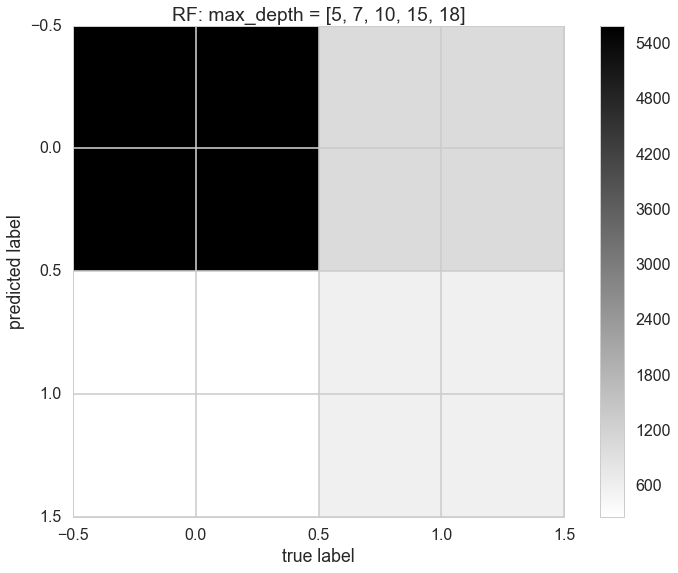

In [21]:
from sklearn import metrics
plt.figure()
plt.imshow(metrics.confusion_matrix(Y1_pred, Y1_test),
               interpolation='nearest', cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.title("RF: max_depth = {0}".format(max_depth))

## Lets plot roc_curve for this model

In [22]:
n_classes =Y1_test.shape

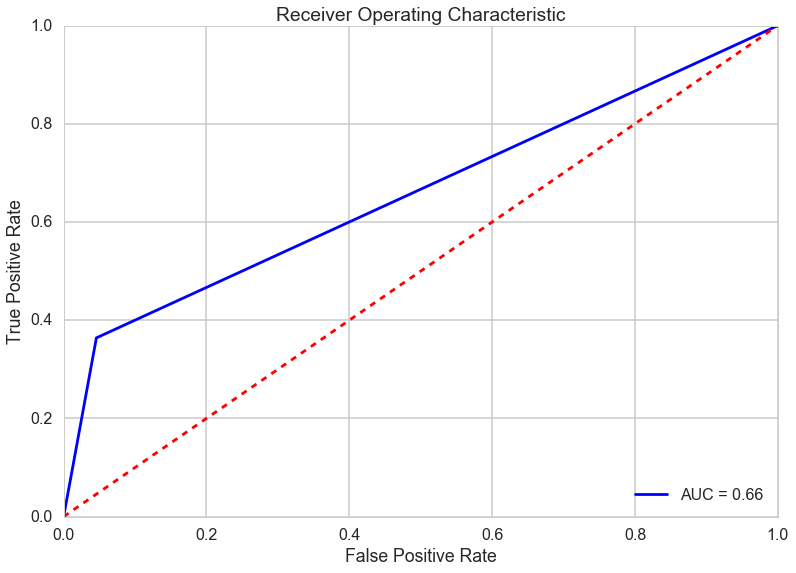

In [23]:
fpr, tpr, threshold = metrics.roc_curve(Y1_test,Y1_pred)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


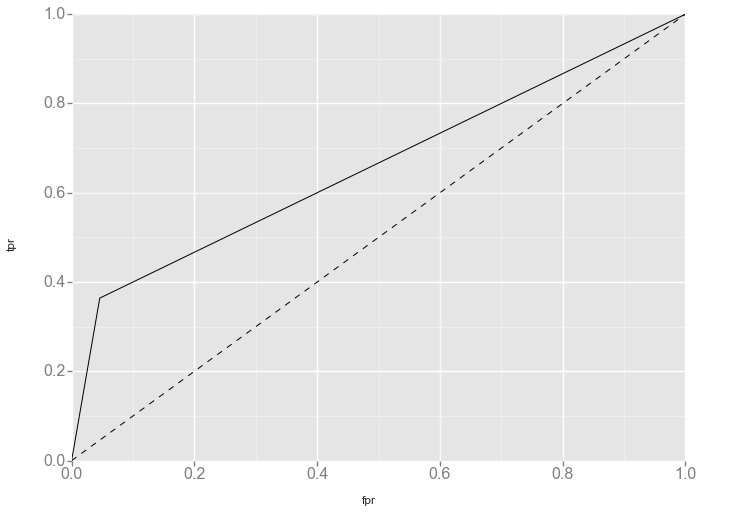

<ggplot: (167014382270)>

In [24]:
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [25]:
## getting 82.693 accuracy with _4 features
## After removing AGE models gives good accuracy --82.533
## Removing SEX column gives --82.613
## Removing both gave --82.453
## Removing Marriage gave me -- 82.600
## LIMIT_BAL gave me --82.44
## Removing everything with pay_3, pay_4 gives --82.787
## Adding LIMIT_BAL, MARRIAGE,AGE, SEX, EDUCATION --82.547
## Removing marriage -- 82.627
## Removing BILL_AMT3, BILL_AMT4-- 82.707
## BILL_AMT2--82.773
## Adding PAY_AMT5, PAY_AMT6 gave me -- 82.98